In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# extract the video frames
video_filename = r"C:\Users\lukeasargen\projects\uas_misc\cam_calibration\images\Gopr0752-1.mp4"
out_folder = r"C:\Users\lukeasargen\projects\uas_misc\cam_calibration\images\gopro_session_5_1080_w"
batch_size = 20

vidcap = cv2.VideoCapture(video_filename)
frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"{frame_count = }")
count = 0
all_sharpness = []
sharpness = []
images = []
success, frame = vidcap.read()
while success:
    # Estimate sharpness
    v = np.median(frame)
    sigma = 0.33
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edges = cv2.Canny(frame, lower, upper)
    mean, std = cv2.meanStdDev(edges)
    res = mean[0][0] * std[0][0]
    images.append(frame)
    sharpness.append(res)
    all_sharpness.append(res)
    if len(images)==batch_size:
        max_index = sharpness.index(max(sharpness))
        out = images[max_index]
        cv2.imwrite(f"{out_folder}/{count-batch_size+max_index}.jpg", out)
        sharpness = []
        images = []
    # Get the next frame
    success, frame = vidcap.read()
    count += 1
    print(f"{count = }", end="\r")

vidcap.release()

frame_count = 6881


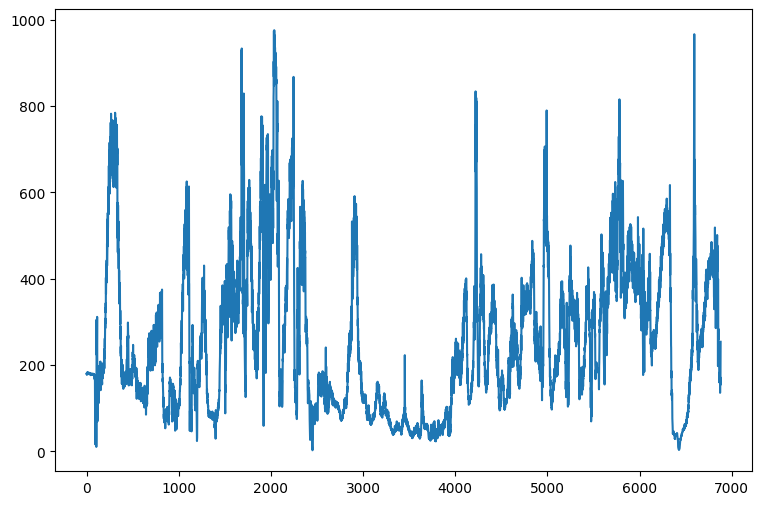

In [3]:
fig = plt.figure(figsize=(9,6))
ax = fig.subplots(nrows=1, ncols=1)
ax.plot(list(range(len(all_sharpness))), all_sharpness)
